In [27]:
import pandas as pd
import numpy as np


In [28]:
df = pd.read_csv('archive/weather_features.csv')
df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


# 1
Quante sono le istanze contenute nel dataset? _______ Il dataset è completo (cioè per ogni
istanza tutti i valori di attributo sono sempre correttamente specificati – non esistono “missing
values”)? _______ Il dataset è bilanciato per quanto riguarda la classe da predire? _________
(punti 1).

In [29]:
print(df.shape[0])
print(df.isnull().sum())
print(f' Bilanciato? {df['weather_main'].value_counts()}')

178396
dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64
 Bilanciato? weather_main
clear           82685
clouds          68055
rain            17391
mist             3908
fog              2506
drizzle          1724
thunderstorm     1041
haze              435
dust              347
snow              270
smoke              33
squall              1
Name: count, dtype: int64


# 2
Le rilevazioni con pressione e umidità uguale a 0 sono irreali. Quante sono queste rilevazioni?
Eliminarle dal dataset (punti 1)

In [30]:
print(df[df['pressure'] == 0].shape[0])
print(df[df['humidity'] == 0].shape[0])
df.drop(df[df['humidity'] == 0].index, inplace=True)
df.drop(df[df['pressure'] == 0].index, inplace=True)
print(df[df['pressure'] == 0].shape[0])
print(df[df['humidity'] == 0].shape[0])


2
63
0
0


# 3
Analizzare la temperatura massima rilevata. Valutare se la distribuzione dei valori assume un
andamento simile a una gaussiana. Considerare poi le rilevazioni che si collocano all’interno del
5% delle temperature più alte. Le città sono equamente presenti in quella fascia di rilevazioni?
Come è il tempo complessivo nei giorni in cui la temperatura massima è in quella fascia per ogni
città? (punti 4)

321.15
Axes(0.125,0.11;0.775x0.77)


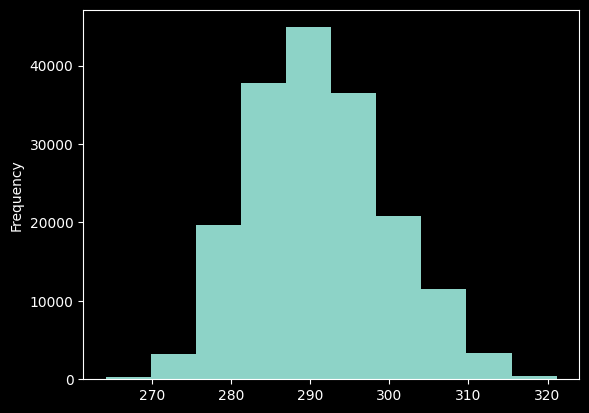

In [33]:
print(df['temp_max'].max())
print(df['temp_max'].plot(kind='hist'))

In [39]:
# df['temp_max'].sort_values(ascending=False)[0:int(df.shape[0]/20)]

soglia = df['temp_max'].quantile(0.95)
print(soglia)
df_5per = df[df['temp_max'] > soglia]
df_5per

306.15


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
3183,2015-05-13 15:00:00+02:00,Valencia,306.6240,306.6240,306.6240,991,26,2,142,0.0,0.0,0.0,24,801,clouds,few clouds,02d
3184,2015-05-13 16:00:00+02:00,Valencia,306.4425,306.4425,306.4425,1006,24,2,133,0.0,0.0,0.0,28,802,clouds,scattered clouds,03
3185,2015-05-13 17:00:00+02:00,Valencia,306.2610,306.2610,306.2610,992,25,2,124,0.0,0.0,0.0,32,802,clouds,scattered clouds,03d
3201,2015-05-14 09:00:00+02:00,Valencia,306.9520,306.9520,306.9520,987,22,2,244,0.0,0.0,0.0,0,800,clear,sky is clear,01d
3202,2015-05-14 10:00:00+02:00,Valencia,306.9520,306.9520,306.9520,987,22,2,244,0.0,0.0,0.0,0,800,clear,sky is clear,01d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175982,2018-09-25 20:00:00+02:00,Seville,307.5400,307.1500,308.1500,1016,23,2,250,0.0,0.0,0.0,0,800,clear,sky is clear,01d
176002,2018-09-26 16:00:00+02:00,Seville,306.5400,306.1500,307.1500,1021,32,3,100,0.0,0.0,0.0,20,801,clouds,few clouds,02d
176004,2018-09-26 18:00:00+02:00,Seville,306.5400,306.1500,307.1500,1020,32,1,110,0.0,0.0,0.0,0,800,clear,sky is clear,01d
176005,2018-09-26 19:00:00+02:00,Seville,305.9400,305.1500,307.1500,1020,32,4,100,0.0,0.0,0.0,0,800,clear,sky is clear,01d


In [40]:
df_5per['city_name'].value_counts()

city_name
Seville       5090
Madrid        1924
Valencia       576
 Barcelona     569
Bilbao         381
Name: count, dtype: int64

In [44]:
meteo_per_citta = pd.crosstab(df_5per['city_name'], df_5per['weather_main'])
print("\nCondizioni meteo nei giorni più caldi per ogni città:")
meteo_per_citta


Condizioni meteo nei giorni più caldi per ogni città:


weather_main,clear,clouds,drizzle,dust,fog,haze,mist,rain,thunderstorm
city_name,,,,,,,,,
Barcelona,283,259,0,0,0,0,0,27,0
Bilbao,219,158,0,0,0,0,0,3,1
Madrid,1520,379,0,0,0,0,0,14,11
Seville,4103,621,10,168,11,11,23,129,14
Valencia,302,271,0,0,0,0,0,2,1


In [47]:
# Calcoli la tabella di frequenza normalizzata (percentuali)
meteo_pct = pd.crosstab(df_5per['city_name'], df_5per['weather_main'], normalize='index') * 100

print("Distribuzione percentuale del meteo nei giorni caldi:")
display(meteo_pct.round(1)) # Arrotonda a 1 decimale

Distribuzione percentuale del meteo nei giorni caldi:


weather_main,clear,clouds,drizzle,dust,fog,haze,mist,rain,thunderstorm
city_name,,,,,,,,,
Barcelona,49.7,45.5,0.0,0.0,0.0,0.0,0.0,4.7,0.0
Bilbao,57.5,41.5,0.0,0.0,0.0,0.0,0.0,0.8,0.3
Madrid,79.0,19.7,0.0,0.0,0.0,0.0,0.0,0.7,0.6
Seville,80.6,12.2,0.2,3.3,0.2,0.2,0.5,2.5,0.3
Valencia,52.4,47.0,0.0,0.0,0.0,0.0,0.0,0.3,0.2


# 4
Verificare se quando nevica la temperatura sia prossima alla temperatura di congelamento
(NOTA: il dataset riporta i valori in Kelvin) (punti 2)

In [54]:
df_snow = df[df['weather_main'] == 'snow']
stats_snow = df_snow['temp_max'].describe()

print("Statistiche temperatura (K) nei giorni di neve:")
print(stats_snow)

print("\n--- Confronto con il punto di congelamento ---")
mean_temp = df_snow['temp_max'].mean()
print(f"Temperatura media con neve: {mean_temp:.2f} K")
print(f"Distanza dal punto di congelamento (273.15 K): {mean_temp - 273.15:.2f} K")

Statistiche temperatura (K) nei giorni di neve:
count    268.000000
mean     276.861075
std        2.470132
min      270.150000
25%      275.150000
50%      277.150000
75%      278.150000
max      282.150000
Name: temp_max, dtype: float64

--- Confronto con il punto di congelamento ---
Temperatura media con neve: 276.86 K
Distanza dal punto di congelamento (273.15 K): 3.71 K


# 5
Confrontare l’escursione termica media (temp_max-temp_min) registrata nei giorni in cui
nevica, con quella delle giornate che sono all’interno del 5% delle temperature più alte (punti 2)

In [58]:
esc_snow = df_snow['temp_max']-df_snow['temp_min']
mean_esc_snow = esc_snow.mean()
print(f'Escursione media quando nevica: {mean_esc_snow}')

esc_5per = df_5per['temp_max']-df_5per['temp_min']
mean_esc_5per = esc_5per.mean()
print(f'Escursione media quando siamo al 5% dalla max temp: {mean_esc_5per}')


Escursione media quando nevica: 2.9141791044776117
Escursione media quando siamo al 5% dalla max temp: 7.852272833723652
